### Ran at following tags
MagD https://github.com/pnsn/magD/tree/v2.1

magd_client https://github.com/pnsn/magd_client/tree/v2.2

# Azimuthal Gap of 2019 PNSN stations

1. Run a distance or noise matrix
1. Transform to az grid

In [1]:
from magD.magD import MagD
from magD.pickle import get_pickle
import os

# some constants for all plots

# path to local libraries
magd_client_path = '/Users/joncon/Sites/magd_client/'
pickle_path = magd_client_path + "/pickle_jar"
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())

# params for all profiles
lat_min = 46.0
lat_max = 48.0
lon_min = -123.0
lon_max = -121.0
resolution = 0.1
num_solutions = 4
nyquist_correction = 0.4
mu = 3e11
qconst = 300.0
beta = 3.5

# create all data sources icons can be changed without rebuilding magD object
data_srcs = {'current':
                {
                     'csv_path': 'csv/2019_eew/current.csv',
                     'starttime': '2019-01-01',
                     'endtime': '2019-03-31',
                     'color': 'yellow',
                     'symbol': '^',
                     'size': 50,
                     'unit': 'Mw',
                     'label': "Existing",
                     'klass': 'scnl'
                 },
            'notional':
                 {
                    'csv_path': 'csv/2019_eew/notional.csv',
                    'starttime': '2019-01-01',
                    'endtime': '2019-03-31',
                    'color': 'red',
                    'symbol': '^',
                    'size': 50,
                    'label': 'Notional',
                    'klass': 'scnl',
                    'unit': 'Mw',
                }
             }


def make_grid(grid_type, src, lat_min=lat_min, lat_max=lat_max, lon_min=lon_min, lon_max=lon_max):
    grid = MagD(grid_type, name, resolution, lat_min, lat_max, lon_min, lon_max, 
                num_solutions, pickle_path, nyquist_correction, mu, qconst, beta)
    grid.build_markers(src)
    grid.build_origins()
    grid.build_matrix()
    grid.save()
    return grid


Working in /Users/joncon/Sites/magd_client


In [2]:
# only run once
# set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Station data

### Existing EEW contributing stations

ShakeAlert Coordinator provided two xls files, one current west coast eew, one notional west coast eew. Both files were edited in Numbers, where the SM and BB channels we're filtered to unique files:

* ./csv/2019_eew/existing_bb.csv 
* ./csv/2019_eew/existing_sm.csv
* ./csv/2019_eew/notional_bb.csv
* ./csv/2019_eew/notional_sm.csv

Headers were changed as needed:
* sta
* chan
* net
* location
* lat
* lon
* rate

## Create and save MagD

In [4]:
name = "2019_eew_existing_all"
grid_type = 'dist_max'

src = {}
src['current'] = data_srcs['current']
%time grid_eew_current = make_grid(grid_type, src)
print(grid_eew_current.get_path())

Profiling spatially...
lat: 46.0, 47.0, CPU times: user 3.59 s, sys: 7.94 ms, total: 3.6 s
Wall time: 3.6 s
/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_all/dist_max_grid/20x20-res-0.1.pickle


## Azmuthal Gap  Maps

### Instantiate MagD objects
If needed, instantiate runs from above. This is useful when kernel has been restarted or mapping is done at a later time. Paths come from stdout from above runs. Ensure this path is updated if MagD is reran at different resolution.

In [3]:
%time grid_eew_current = get_pickle( \
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_all/dist_max_grid/200x200-res-0.01.pickle")

CPU times: user 770 ms, sys: 56.9 ms, total: 827 ms
Wall time: 826 ms


In [5]:
# tranform grid to az gap
grid_az_current = grid_eew_current.copy('az_gap', 'az_gap')
grid_az_current.type = 'azmuthal_gap'
grid_az_current.transform_to_azmuthul_gap()
grid_az_current.save()

-----------
[329.48206217259013, 175.02127128818563, 169.23796868861706, 49.22256425211786]
[409.2225642521179, 329.48206217259013, 175.02127128818563, 169.23796868861706, 49.22256425211786]
-----------
154.4607908844045
-----------
[356.9313384670357, 216.64650298513595, 140.50545180353637, 136.20225747685393]
[496.2022574768539, 356.9313384670357, 216.64650298513595, 140.50545180353637, 136.20225747685393]
-----------
140.28483548189973
-----------
[195.5780947398841, 124.40386380585987, 118.60406067520506, 25.750610544060994]
[385.750610544061, 195.5780947398841, 124.40386380585987, 118.60406067520506, 25.750610544060994]
-----------
190.17251580417687
-----------
[289.8230802649988, 169.47163788227016, 110.22126859656193, 45.49272948579671]
[405.4927294857967, 289.8230802649988, 169.47163788227016, 110.22126859656193, 45.49272948579671]
-----------
120.35144238272864
-----------
[299.2112473304201, 146.9430833954791, 105.50431229805969, 57.176450531148326]
[417.1764505311483, 299.2

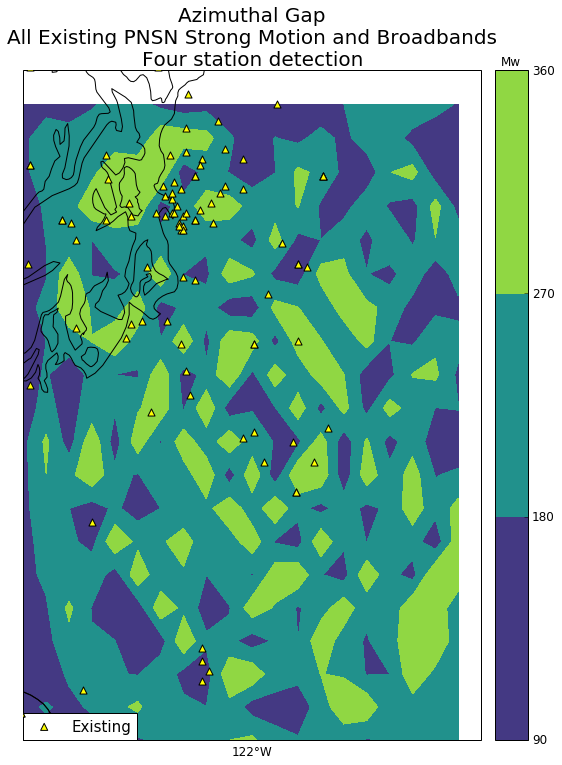

CPU times: user 6.71 s, sys: 224 ms, total: 6.93 s
Wall time: 6.29 s


In [6]:
path = grid_az_current.get_path()

%time %run -i scripts/plot_heatmap.py \
--path=$path \
--title1='Azimuthal Gap' \
--title2='All Existing PNSN Strong Motion and Broadbands' \
--title3='Four station detection' \
--color=viridis \
--stas \
--lat_min=$lat_min \
--lat_max=$lat_max \
--lon_min=$lon_min \
--lon_max=$lon_max \
--plotwidth=12 \
--plotheight=12 \
--legend_pad=0.0 \
--colorbar_pad=0.02 \
--levels=90,180,270,360

# Find a good station 
Look for station used in highest number of solutions for a proxy for future stations

In [10]:
'''How many times was a station as part of a four station solution'''
scnls = grid_eew_existing_all.productive_scnls()
length = len(scnls)
percentile95 =round((length - length*.95))

contribs = [s.contrib_solutions for s in scnls]
print(contribs.index(2))
stas = [s.sta for s in scnls]
template = scnls[percentile95]
#50th percentile channel by number of contributing solutions


# make a sample csv line 
i = percentile95
print("95th percentile:")
print(template.sta + "," + template.chan +
      "," + template.net + "," + template.loc + "," +
      str(scnls[i].lat) + "," + str(scnls[i].lon) +
      "," + str(scnls[i].samprate))
i = 130
bad = scnls[i]
print("Median:")
print(bad.sta + "," + bad.chan +
      "," + bad.net + "," + bad.loc + "," +
      str(scnls[i].lat) + "," + str(scnls[i].lon) +
      "," + str(scnls[i].samprate))

153
95th percentile:
OD2,HHZ,UW,—,47.38754,-118.71077,200
Median:
LUMI,HHZ,UW,--,48.72,-122.71,100


In [14]:
data_srcs['notional'] = {
    'csv_path': 'csv/2019_eew/notional.csv',
    'starttime': '2019-01-01',
    'endtime': '2019-03-31',
    'color': 'red',
    'symbol': '^',
    'size': 50,
    'label': 'Notional',
    'klass': 'scnl',
    'unit': 'Mw',
    'template_sta': template.sta,
    'template_chan': template.chan,
    'template_net': template.net,
    'template_loc': template.loc
}

In [15]:
# use the template pdf from above to as proxy for notional stations
name = "2019_eew_existing_and_notional"
grid_type = 'detection'

src = {}
src['current'] = data_srcs['current']
src['notional'] = data_srcs['notional']
%time grid_eew_existing_and_notional = make_grid(grid_type, src)
print(grid_eew_existing_and_notional.get_path())

JRO:BHZ:--:CC startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
COR:BHZ:0:IU startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
BMO:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
HAWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NEW:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NLWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
WVOR:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
LON:BHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:HHZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TREE:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returne

In [17]:
%time grid_eew_existing_and_notional = get_pickle( \
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_and_notional/detection_grid/140x150-res-0.1.pickle")

CPU times: user 517 ms, sys: 10.3 ms, total: 528 ms
Wall time: 529 ms


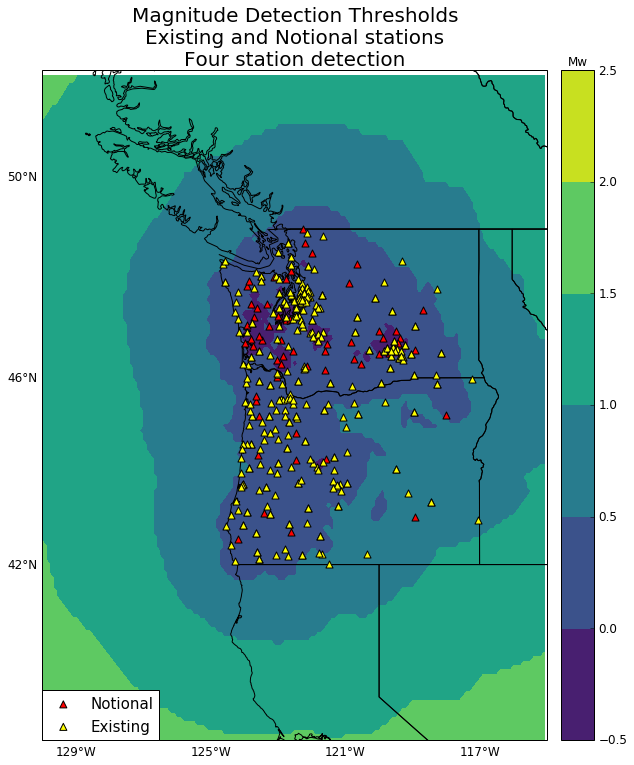

CPU times: user 1.64 s, sys: 167 ms, total: 1.81 s
Wall time: 1.17 s


In [18]:
path = grid_eew_existing_and_notional.get_path()

%time %run -i scripts/plot_heatmap.py \
--title1='Magnitude Detection Thresholds' \
--title2='Existing and Notional stations' \
--title3='Four station detection' \
--path=$path \
--stas \
--color=viridis \
--lat_min=38.0 \
--lat_max=52.0 \
--lon_min=-130.0 \
--lon_max=-115.0 \
--plotwidth=12 \
--plotheight=12 \
--legend_pad=0.0 \
--colorbar_pad=0.02 \
--levels=-0.5,0,0.5,1,1.5,2,2.5 \

In [19]:
%time grid_eew_existing_and_notional_diff = grid_eew_existing_and_notional.copy("diff_all_and_notional", "diff_all_and_notional")
%time grid_eew_existing_and_notional_diff.matrix = grid_eew_existing_all.matrix - grid_eew_existing_and_notional.matrix
%time grid_eew_existing_and_notional_diff.save()
print(grid_eew_existing_and_notional_diff.get_path())

CPU times: user 2.07 s, sys: 27.9 ms, total: 2.1 s
Wall time: 2.1 s
CPU times: user 210 µs, sys: 56 µs, total: 266 µs
Wall time: 217 µs
CPU times: user 274 ms, sys: 8.82 ms, total: 283 ms
Wall time: 287 ms
/Users/joncon/Sites/magd_client//pickle_jar/diff_all_and_notional/diff_all_and_notional_grid/140x150-res-0.1.pickle


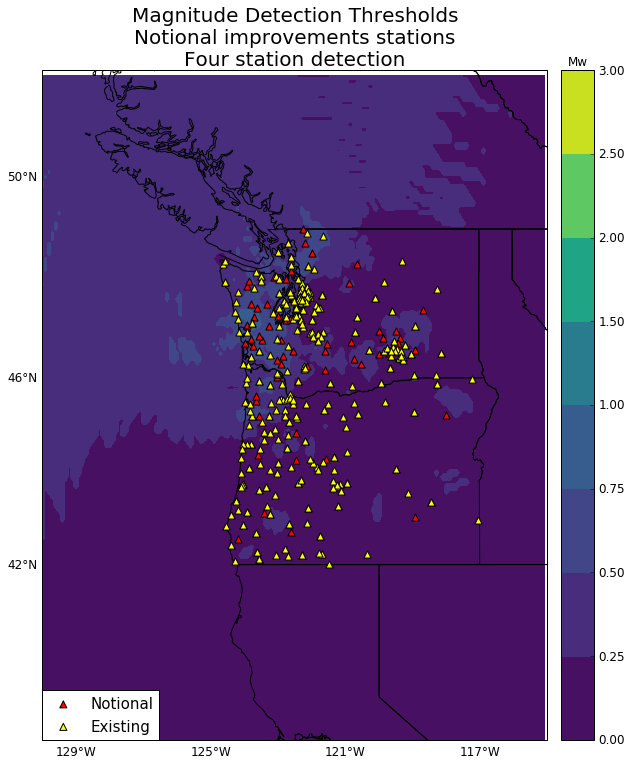

CPU times: user 1.73 s, sys: 171 ms, total: 1.9 s
Wall time: 1.26 s


In [20]:
# Perfomance 2 min 18 sec
path = grid_eew_existing_and_notional_diff.get_path()

%time %run -i scripts/plot_heatmap.py \
    --path=$path \
    --title1='Magnitude Detection Thresholds' \
    --title2='Notional improvements stations' \
    --title3='Four station detection' \
    --stas \
    --color=viridis \
    --lat_min=38.0 \
    --lat_max=52.0 \
    --lon_min=-130.0 \
    --lon_max=-115.0 \
    --plotwidth=12 \
    --plotheight=12 \
    --legend_pad=0.0 \
    --colorbar_pad=0.02 \
    --levels=0,0.25,0.5,0.75,1,1.5,2,2.5,3